In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline


run_name = 'proud-dragon-3837'

# open the pickled log file from pickled_logs directory
logger = pd.read_pickle('pickled_logs/'+run_name+'.pkl')
df = pd.read_csv('datasets/Teconer_downtown_100K.csv').dropna()

X = np.array(logger.X)
# df = pd.DataFrame()
# convert X to a dataframe with columns 'AbsoluteTime','Latitude', 'Longitude','Tsurf', 'Ta','Hours','Speed','Months'
# df['AbsoluteTime'] = X[:,0].astype('float64')
# df['Latitude'] = X[:,1].astype('float64')
# df['Longitude'] = X[:,2].astype('float64')
# df['Tsurf'] = X[:,3].astype('float64')
# df['Ta'] = X[:,4].astype('float64')
# df['Hours'] = X[:,5].astype('int64')
# df['Speed'] = X[:,6].astype('float64')
# df['Months'] = X[:,7].astype('int')
df['y'] = np.array(logger.y, dtype='float64')
df['y_pred'] = np.array(logger.y_pred, dtype='float64')
# df['abs_error'] = logger.error

# convert DateTime to datetime
df['DateTime'] = pd.to_datetime(df['DateTime'])

print(len(df))
df.tail()


88249


,AbsoluteTime,DateTime,Months,Hours,Latitude,Longitude,Friction,Tsurf,Ta,VehicleID,Speed,TripID,y,y_pred
88244,37804189.0,2019-03-13 13:09:49,3.0,13.0,60.203535,24.880454,0.79,3.34,3.5,1253,30.9,7226,0.79,0.704580
88245,37804215.0,2019-03-13 13:10:15,3.0,13.0,60.203086,24.873123,0.80,3.19,3.5,1253,83.4,7226,0.80,0.698000
88246,37804332.0,2019-03-13 13:12:12,3.0,13.0,60.209601,24.820037,0.81,2.99,3.2,1253,72.2,7226,0.81,0.687146
88247,37804367.0,2019-03-13 13:12:47,3.0,13.0,60.208617,24.809106,0.81,2.82,3.1,1253,69.3,7226,0.81,0.672186
88248,37804383.0,2019-03-13 13:13:03,3.0,13.0,60.208498,24.803030,0.81,2.55,3.0,1253,89.6,7226,0.81,0.670372


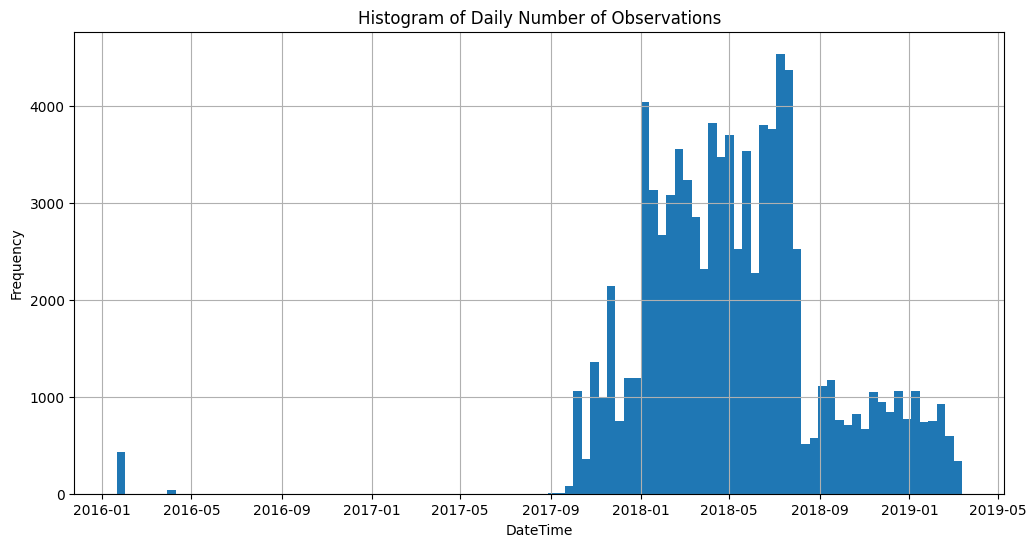

In [2]:
# make a histogram of daily number of observations over datetime
plt.figure(figsize=(12,6))
df['DateTime'].hist(bins=100)
plt.title('Histogram of Daily Number of Observations')
plt.xlabel('DateTime')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# df_ = df[df['Months'] == 3]
# # plot y_pred vs lat/long in seaborn scatter plot
# plt.figure(figsize=(10,10))
# sns.scatterplot(x='Latitude', y='Longitude', hue='y_pred', data=df_, edgecolor='none', palette='viridis', alpha=0.2)
# plt.xlim(60.15, 60.26)
# plt.ylim(24.78, 24.92)
# plt.title('Predicted Friction')
# plt.show()

In [6]:
# plt.close('all')
%matplotlib qt

# inlcude the predictions in the records as a new column
# select df_ with only december and year 2017 using DateTime
df_ = df[(df['DateTime'].dt.month == 3) & (df['DateTime'].dt.year == 2018)]
print(len(df_))




num_bins = 100
# df_ = df[df['Months'] == 3]
# make a heatmap of friction values in lat/long 50 by 50 bins
# Binning data
lat_bins = np.linspace(df_['Latitude'].min(), df_['Latitude'].max(), num_bins+1)
lon_bins = np.linspace(df_['Longitude'].min(), df_['Longitude'].max(), num_bins+1)

hist, lat_edges, lon_edges = np.histogram2d(df_['Latitude'], df_['Longitude'], bins=[lat_bins, lon_bins])
counts, _, _ = np.histogram2d(df_['Latitude'], df_['Longitude'], bins=[lat_bins, lon_bins], weights=df_['y'])

# Avoid division by zero
hist[hist == 0] = np.nan  # Avoid zero division issues
mean_friction = counts / hist

# Visualization
plt.figure(figsize=(10, 8))
plt.imshow(mean_friction.T, origin='lower', extent=[lon_edges[0], lon_edges[-1], lat_edges[0], lat_edges[-1]], aspect='auto', cmap='viridis')
plt.colorbar(label='Mean Friction')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.ylim(60.16, 60.25)
plt.xlim(24.80, 24.90)
plt.title('Heatmap of Friction Values')
plt.show()



7681


In [3]:
# find the the most frequent TripID and print the number of records for that TripID
# tripID = records['TripID'].value_counts().idxmax()
# print('The most frequent TripID is:', tripID)
# print('The number of records for this TripID is:', records['TripID'].value_counts().max())

# make a list of tripIDs sorted by the number of records
tripIDs = records['TripID'].value_counts().index.tolist()
print(len(tripIDs))
tripID = tripIDs[0]

# scatter Latitude and Longitude of the records with the hue of friction (subplot 1) and the predictions (subplot 2)
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
fric = sns.scatterplot(x='Longitude', y='Latitude', hue='Friction', data=records[records['TripID'] == tripID], ax=ax[0], alpha=0.9, palette='viridis', linewidth=0)
pred = sns.scatterplot(x='Longitude', y='Latitude', hue='Predictions', data=records[records['TripID'] == tripID], ax=ax[1], alpha=0.9, palette='viridis', linewidth=0)
# show a colorbar for the friction and the predictions


# lineplot of the records friction and the predictions for the most frequent TripID
fig2, ax = plt.subplots(1, 1, figsize=(20, 10))
sns.lineplot(x='DateTime', y='Validity Horizon', data=records[records['TripID'] == tripID], ax=ax)

# ax.legend(['Measured', 'Predicted'])
# plt.show()




KeyError: 'TripID'

In [ ]:
k = 1
fig, ax = plt.subplots()
for trip_id, trip_records in records.groupby('TripID'):
    trip_records.scatter(x='Latitude', y='Longitude', ax=ax, label=trip_id)
    trip_records.scatter(x='timestamp', y='predictions', ax=ax, label=trip_id, linestyle='dashed')
    k += 1
    if k > 5:
        break